# WTTA - Assignment #1 

## Inputs and Data Loading 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bem import steady_bem
from bem import steady_bem_for_each_airfoil


# Inputs
R = 89.17       # Radius of rotor [m]
V_0 = 10.0      # Wind speed [m/s]
omega = 8.032   # Angular velocity of rotor [RPM]

# Read txt with blade data
df = pd.read_csv('data/bladedat.txt', sep='\t', names=['r', 'beta', 'c', 'thick'])

# RPM to rad/s
omega = omega*2*np.pi/60

# Question 1

In [10]:
number_of_theta_p = 40
number_of_lamda = 40

counter = 0
theta_p_list = np.linspace(-3, 4, number_of_theta_p)
lamda_list = np.linspace(5, 10, number_of_lamda)

# Initiliaze 2D matrices
P_out_matrix = np.zeros((number_of_theta_p, number_of_lamda))
Thrust_matrix = np.zeros((number_of_theta_p, number_of_lamda))
C_P_matrix = np.zeros((number_of_theta_p, number_of_lamda))
C_T_matrix = np.zeros((number_of_theta_p, number_of_lamda))

for i, theta_p in enumerate(theta_p_list):
    for j, lamda in enumerate(lamda_list):
        omega = lamda*V_0/R
        P_out, Thrust, C_P, C_T = steady_bem(R, V_0, omega, theta_p, lamda, df, model='Glauret', error=1e-6)
        P_out_matrix[i, j] = P_out
        Thrust_matrix[i, j] = Thrust
        C_P_matrix[i, j] = C_P
        C_T_matrix[i, j] = C_T

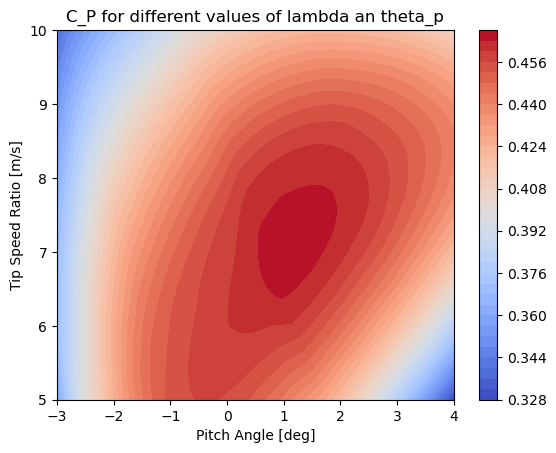

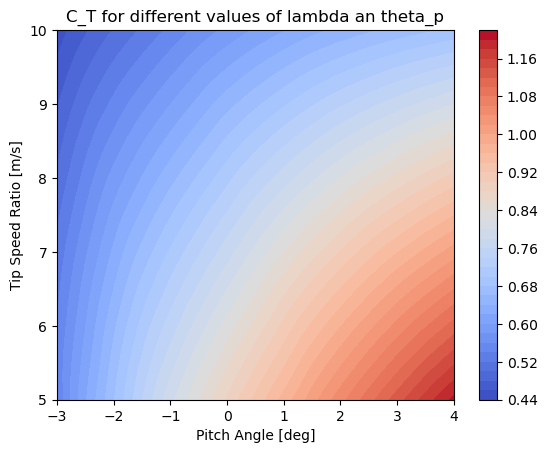

In [11]:
X, Y = np.meshgrid(theta_p_list, lamda_list)

fig, ax = plt.subplots(1, 1)
cp = ax.contourf(X, Y, C_P_matrix, 40, cmap='coolwarm')  # Should we add vmin=0.3, vmax=0.5 ??
fig.colorbar(cp)
ax.set_title('C_P for different values of lambda an theta_p')
ax.set_xlabel('Pitch Angle [deg]')
ax.set_ylabel('Tip Speed Ratio [m/s]')
plt.show()


fig, ax = plt.subplots(1, 1)
cp = ax.contourf(X, Y, C_T_matrix, 40, cmap='coolwarm')  # Should we add vmin=0.3, vmax=0.5 ??
fig.colorbar(cp)
ax.set_title('C_T for different values of lambda an theta_p')
ax.set_xlabel('Pitch Angle [deg]')
ax.set_ylabel('Tip Speed Ratio [m/s]')
plt.show()

In [12]:
def find_maxes_of_matrix(matrix, row_list, column_list):
    max_value = np.max(matrix)
    i, j = np.unravel_index(matrix.argmax(), matrix.shape)
    row = row_list[j]
    column = column_list[i]
    return max_value, row, column

C_P_max, theta_p_for_C_P_max, lamda_for_C_P_max = find_maxes_of_matrix(C_P_matrix, theta_p_list, lamda_list)

print(f'Using {number_of_theta_p} theta_ps and {number_of_lamda} lamdas, ' + \
    f'C_P_max = {C_P_max:.3f} for theta_p = {theta_p_for_C_P_max:.3f} and lamda = {lamda_for_C_P_max:.3f}')

Using 40 theta_ps and 40 lamdas, C_P_max = 0.466 for theta_p = 1.128 and lamda = 7.179


Question 2

Q#2 Try and find the chord and twist angle at r=71.97m that would maximize the local
Cp using the optimum tip speed ratio found in Q#1 and compare it to the table above.
The optimum value for the chord is between 0 and 3 m.

In [50]:
chord = np.linspace(0, 3, 30)
theta_p_list = np.linspace(-3, 4, 30)
lamda = lamda_for_C_P_max
C_P_maximize = []

for c in chord:
    df.iloc[9]['c'] = c
    for theta in theta_p_list:
        CP = steady_bem_for_each_airfoil(R, V_0, omega, theta, lamda, df.iloc[9], model='Glauret', error=1e-6)[2]
        C_P_maximize.append(CP)

CP_matrix = np.reshape(C_P_maximize, (30, 30))

find_maxes_of_matrix(CP_matrix, chord, theta_p_list)

(0.3723005829290125, 0.0, 0.6206896551724141)